In [17]:
import sys

sys.path.append("../src")
from tsfresh.feature_extraction import EfficientFCParameters
import pandas as pd
from mldog.util.drill_detect.data import convertDrillTimeSeriesToFeatures
import time

In [22]:
features = EfficientFCParameters()
features

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'maximum': None, 'absolu

In [19]:
df = pd.read_csv("../data/aufzeichnung_1/2024_10_25_08_20_02_96000Hz.csv")

Go through each feature individually and check the time it takes to extract that feature


In [ ]:
execution_times = []


for key, val in features.items():

    feature_set = {key: val}
    start = time.time()

    convertDrillTimeSeriesToFeatures(df, fcParameters=feature_set)
    end = time.time()

    took = end - start

    execution_times.append((key, took))

Feature Extraction: 100%|██████████| 3/3 [00:00<00:00, 62.97it/s]


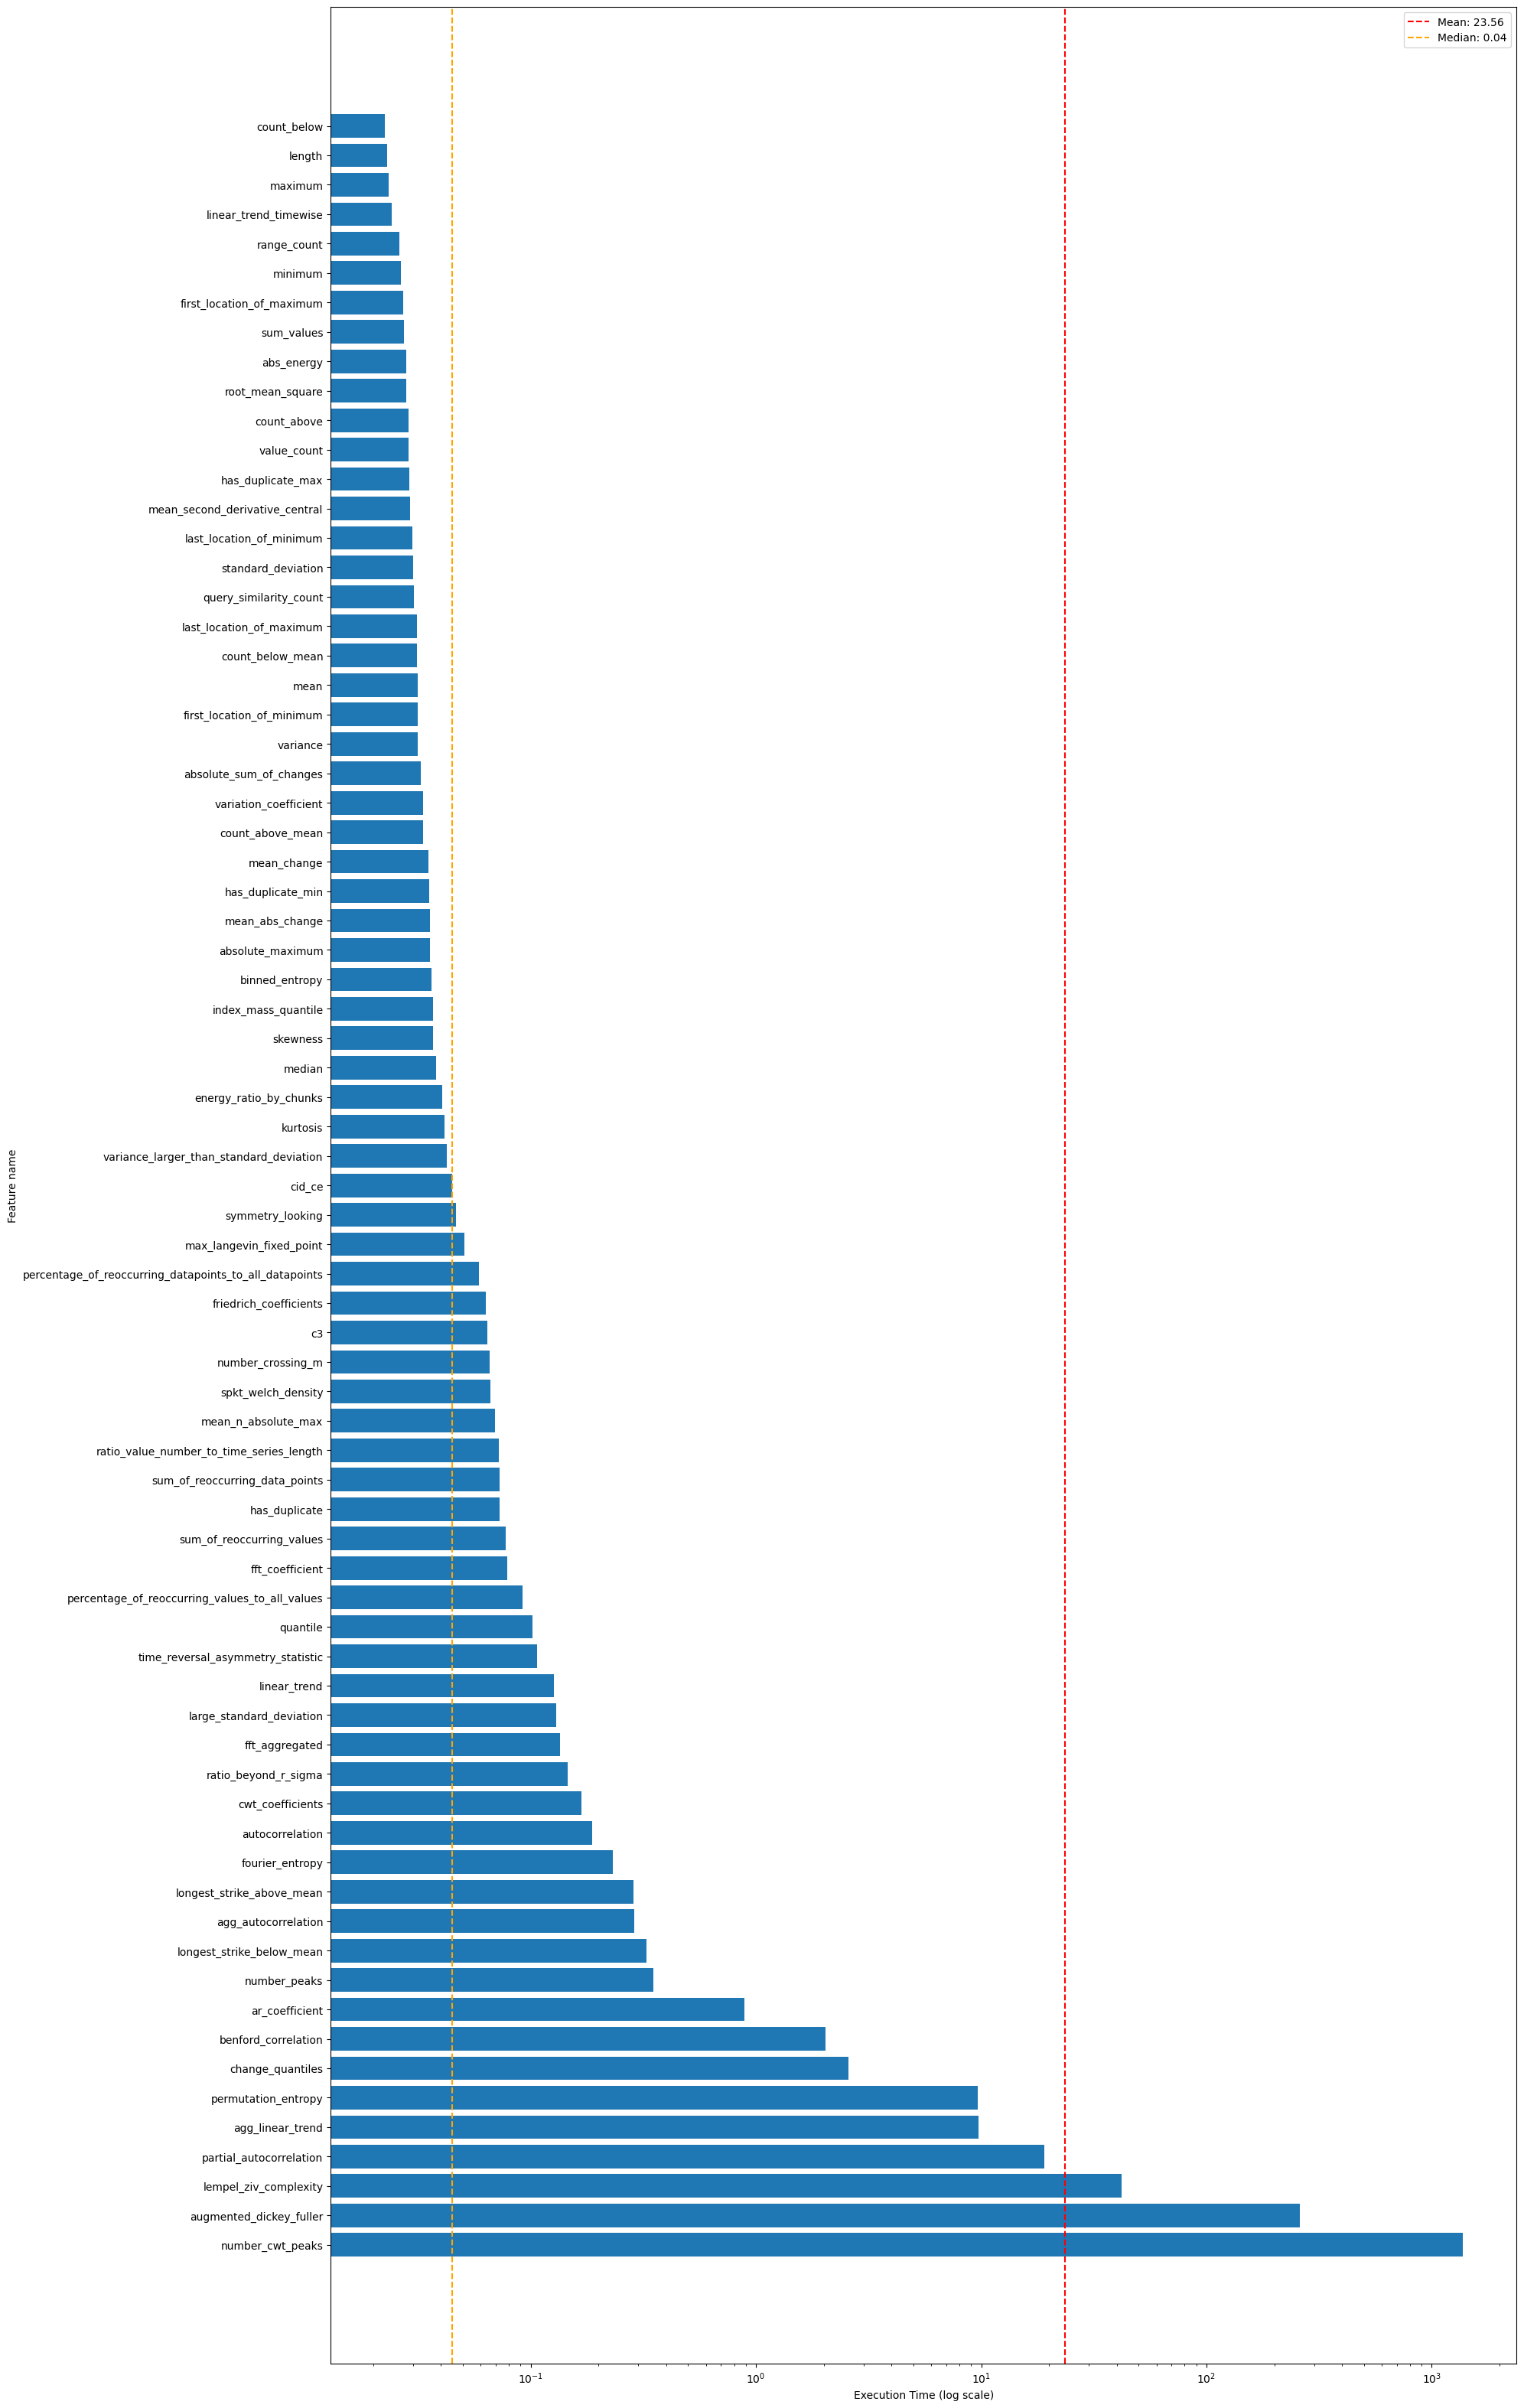

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



sorted_data = sorted(execution_times, key=lambda x: -x[1])


names = [x[0] for x in sorted_data]


times = [x[1] for x in sorted_data]



fig, ax = plt.subplots(figsize=(20, 40))


plt.barh(names, times)

mean_time = np.mean(times)
median_time = np.median(times)



plt.axvline(
    mean_time,

    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Mean: {mean_time:.2f}",
)



plt.axvline(
    median_time,

    color="orange",
    linestyle="--",
    linewidth=1.5,
    label=f"Median: {median_time:.2f}",
)



# Set x-axis to logarithmic scale (since it's horizontal)


plt.xscale("log")



# Add labels and title


plt.xlabel("Execution Time (log scale)")


plt.ylabel("Feature name")


plt.legend()

Take only features that are below a given threshold


In [54]:
threshold = mean_time

In [55]:
filtered_features = features.copy()

for feature_name in [x[0] for x in sorted_data if x[1] > threshold]:
    del filtered_features[feature_name]

print(f"Initial feature set: {len(features.keys())}")
print(f"Reduced feature set: {len(filtered_features.keys())}")

Initial feature set: 73
Reduced feature set: 70


In [56]:
start = time.time()
feat = convertDrillTimeSeriesToFeatures(df, fcParameters=filtered_features)
end = time.time()
took = end - start
print(f"After reduction time took: {took}s")
feat.head()

Feature Extraction: 100%|██████████| 3/3 [00:49<00:00, 16.62s/it]

After reduction time took: 49.93407726287842s


,# Audio__variance_larger_than_standard_deviation,# Audio__has_duplicate_max,# Audio__has_duplicate_min,# Audio__has_duplicate,# Audio__sum_values,# Audio__abs_energy,# Audio__mean_abs_change,# Audio__mean_change,# Audio__mean_second_derivative_central,# Audio__median,...,Current__fourier_entropy__bins_5,Current__fourier_entropy__bins_10,Current__fourier_entropy__bins_100,Current__permutation_entropy__dimension_3__tau_1,Current__permutation_entropy__dimension_4__tau_1,Current__permutation_entropy__dimension_5__tau_1,Current__permutation_entropy__dimension_6__tau_1,Current__permutation_entropy__dimension_7__tau_1,Current__query_similarity_count__query_None__threshold_0.0,Current__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,479301.536975,898755.016994,0.043588,1.786819e-08,0.0,1.75293,...,0.155665,0.215617,0.894328,1.650216,2.84742,4.182008,5.61479,7.114629,NaN,37.815131


In [46]:
filtered_features

{'variance_larger_than_standard_deviation': None, 'has_duplicate_max': None, 'has_duplicate_min': None, 'has_duplicate': None, 'sum_values': None, 'abs_energy': None, 'mean_abs_change': None, 'mean_change': None, 'mean_second_derivative_central': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variation_coefficient': None, 'variance': None, 'skewness': None, 'kurtosis': None, 'root_mean_square': None, 'absolute_sum_of_changes': None, 'longest_strike_below_mean': None, 'longest_strike_above_mean': None, 'count_above_mean': None, 'count_below_mean': None, 'last_location_of_maximum': None, 'first_location_of_maximum': None, 'last_location_of_minimum': None, 'first_location_of_minimum': None, 'percentage_of_reoccurring_values_to_all_values': None, 'percentage_of_reoccurring_datapoints_to_all_datapoints': None, 'sum_of_reoccurring_values': None, 'sum_of_reoccurring_data_points': None, 'ratio_value_number_to_time_series_length': None, 'maximum': None, 'absolu